### zid:z5598515 name: Hang Pan

In [341]:
import pandas as pd

In [342]:
#load data
df=pd.read_csv("./data/dataset.tsv",sep="\t", encoding="utf-8")

In [343]:
df

,artist_name,track_name,release_date,genre,lyrics,topic
0,loving,the not real lake,2016,rock,awake know go see time clear world mirror worl...,dark
1,incubus,into the summer,2019,rock,shouldn summer pretty build spill ready overfl...,lifestyle
2,reignwolf,hardcore,2016,blues,lose deep catch breath think say try break wal...,sadness
3,tedeschi trucks band,anyhow,2016,blues,run bitter taste take rest feel anchor soul pl...,sadness
4,lukas nelson and promise of the real,if i started over,2017,blues,think think different set apart sober mind sym...,dark
...,...,...,...,...,...,...
1495,ra ra riot,absolutely,2016,rock,year absolutely absolutely absolutely crush ab...,emotion
1496,mat kearney,face to face,2018,rock,breakthrough hours hear truth moments trade fa...,dark
1497,owane,born in space,2018,jazz,look look right catch blue eye own state breat...,dark
1498,nappy roots,blowin' trees,2019,hip hop,nappy root gotta alright flyin dear leave lone...,personal


In [344]:
# combine_field
def combine_fields(row):
    return f"{row['artist_name']} {row['track_name']} {row['genre']} {row['lyrics']}"

df['text'] = df.apply(combine_fields, axis=1)

In [345]:
new_df=pd.DataFrame({'Content': df['text'], 'Category': df['topic']})

In [346]:
#do data cleaning
# Drop duplicates and missing values
new_df = new_df.drop_duplicates()
new_df = new_df.dropna()

In [347]:
new_df.head()

,Content,Category
0,loving the not real lake rock awake know go se...,dark
1,incubus into the summer rock shouldn summer pr...,lifestyle
2,reignwolf hardcore blues lose deep catch breat...,sadness
3,tedeschi trucks band anyhow blues run bitter t...,sadness
4,lukas nelson and promise of the real if i star...,dark


# Part1

### Q1.

In [348]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()
    # text = re.sub(r'[^\w\s]', '', text)     # Check what this removes --- might be too much!
    text = re.sub(r'\s+', ' ', text)
    text=re.sub(r"[^\w\s'\-]", ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()                # Remove extra spaces
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to each document
new_df['Content'] = new_df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/russell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/russell/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/russell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [349]:
print(new_df['Content'].head())

0    love real lake rock awak know go see time clea...
1    incubu summer rock summer pretti build spill r...
2    reignwolf hardcor blue lose deep catch breath ...
3    tedeschi truck band anyhow blue run bitter tas...
4    luka nelson promis real start blue think think...
Name: Content, dtype: object


In [350]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create pipeline: vectorizer + classifier
bnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', BernoulliNB())
])

# Evaluate with 5-fold cross-validation
scores = cross_val_score(bnb_pipeline, new_df['Content'], new_df['Category'], cv=skf, scoring='f1_macro')
print("BernoulliNB Cross-Validated Macro F1 Score: {:.4f}".format(scores.mean()))


BernoulliNB Cross-Validated Macro F1 Score: 0.3398


In [351]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

y_pred_cv = cross_val_predict(bnb_pipeline, new_df['Content'], new_df['Category'], cv=skf)
print(classification_report(new_df['Category'], y_pred_cv))

              precision    recall  f1-score   support

        dark       0.64      0.77      0.70       487
     emotion       0.00      0.00      0.00        79
   lifestyle       0.00      0.00      0.00       202
    personal       0.68      0.32      0.43       341
     sadness       0.43      0.84      0.56       371

    accuracy                           0.54      1480
   macro avg       0.35      0.39      0.34      1480
weighted avg       0.47      0.54      0.47      1480



/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

### Part 1 - Q1: Addressing Simplifications in the Tutorial

The tutorial notebook contained two key simplifications:

1. **Overly aggressive regex in preprocessin**  
   The original regular expression `re.sub(r'[^\w\s]', '', text)` removes all non-word characters, including potentially meaningful ones such as apostrophes (`'`), hyphens ,It is more suitable for English corpora in natural language processing and avoids destroying the structure of words(`-`), or musical symbols that may help understand genre-specific lyrics and song structre.  
   **Fix:** We modified the regex to the following:
   ```python
   re.sub(r"[^\w\s'\-]", ' ', text)


2. **Using cross-validation**
The original tutorial uses a single random train-test split, which can result in unstable and unrepresentative evaluation due to sampling variance. StratifiedKFold ensures that in each compromise, the Category distribution of new_df['Category'] is consistent with the entire dataset
   **Fix**: We replaced this with 5-fold cross-validation using `cross_val_score from sklearn.model_selection`:
``` python
scores = cross_val_score(pipeline, X, y, cv=sfk, scoring='accuracy')


We used `cross_val_score` with the default `scoring='accuracy'`, but we note that:
- Accuracy is suitable only when classes are balanced.
- In later questions, we will include other metrics such as macro-F1 and weighted-F1 which are better for class imbalance (as seen in the lecture: macro-averaging is less dominated by large classes). we just do experiment here.


### Q2.

### Multinomial Naive Bayes

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/russell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/russell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/russell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


V1 - Lowercase only: accuracy = 0.8088, macro F1 = 0.7457
V2 - +Stopwords removed: accuracy = 0.8081, macro F1 = 0.7453
V3 - +Stemming: accuracy = 0.8081, macro F1 = 0.7452
V4 - +Lemmatization: accuracy = 0.8095, macro F1 = 0.7463
V5 - sklearn stopwords: accuracy = 0.8027, macro F1 = 0.7331
    accuracy
V4  0.809459
V1  0.808784
V2  0.808108
V3  0.808108
V5  0.802703


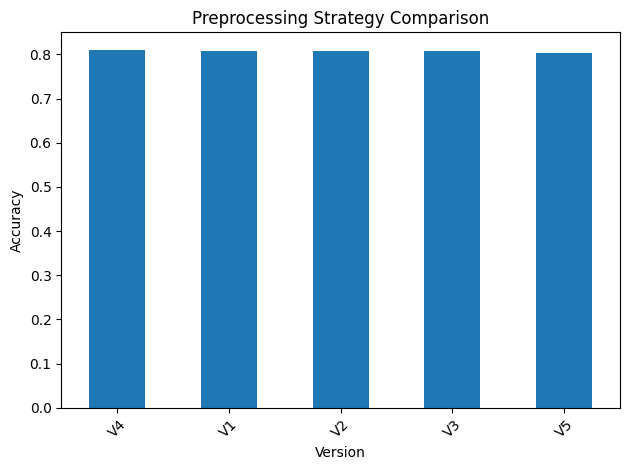

In [352]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# ------- Different Preprocessing Versions -------

def preprocess_v1(text):
    # simple lowercasing and tokenization, no stopword removal
    text = text.lower()
    text = re.sub(r"[^\w\s'\-]", ' ', text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    return ' '.join(tokens)

def preprocess_v2(text):
    # simple lowercasing and tokenization + stopword removal
    text = text.lower()
    text = re.sub(r"[^\w\s'\-]", ' ', text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def preprocess_v3(text):
    # simple lowercasing and tokenization + stopword + stemming
    text = text.lower()
    text = re.sub(r"[^\w\s'\-]", ' ', text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_v4(text):
    # simple lowercasing and tokenization + stopword + lemmatization
    text = text.lower()
    text = re.sub(r"[^\w\s'\-]", ' ', text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


from sklearn.metrics import classification_report

def evaluate_preprocessing(preprocess_func, name, use_sklearn_stopwords=False):
    processed_text = new_df['Content'].apply(preprocess_func)
    sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    if use_sklearn_stopwords:
        vectorizer = CountVectorizer(stop_words='english')
    else:
        vectorizer = CountVectorizer()

    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', MultinomialNB())
    ])

    f1_scores = []
    acc_scores = []
    for train_idx, test_idx in sfk.split(processed_text, new_df['Category']):
        X_train, X_test = processed_text.iloc[train_idx], processed_text.iloc[test_idx]
        y_train, y_test = new_df['Category'].iloc[train_idx], new_df['Category'].iloc[test_idx]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        acc_scores.append(report['accuracy'])
        f1_scores.append(report['macro avg']['f1-score'])

    print(f"{name}: accuracy = {sum(acc_scores)/5:.4f}, macro F1 = {sum(f1_scores)/5:.4f}")
    return {'accuracy': sum(acc_scores)/5, 'macro_f1': sum(f1_scores)/5}



results = {}
results['V1'] = evaluate_preprocessing(preprocess_v1, 'V1 - Lowercase only')
results['V2'] = evaluate_preprocessing(preprocess_v2, 'V2 - +Stopwords removed')
results['V3'] = evaluate_preprocessing(preprocess_v3, 'V3 - +Stemming')
results['V4'] = evaluate_preprocessing(preprocess_v4, 'V4 - +Lemmatization')
results['V5'] = evaluate_preprocessing(preprocess_v1, 'V5 - sklearn stopwords', use_sklearn_stopwords=True)

# ------- Summary -------
import pandas as pd
import matplotlib.pyplot as plt

summary_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
summary_df = summary_df.sort_values(by='accuracy', ascending=False)
print(summary_df)

summary_df.plot(kind='bar', legend=False, title='Preprocessing Strategy Comparison', ylabel='Accuracy', xlabel='Version')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Summary

To identify the most effective preprocessing strategy for topic classification using Multinomial Naive Bayes with CountVectorizer, I evaluated five variations:

| Preprocessing Version | Description                                | Accuracy |
| --------------------- | ------------------------------------------ | -------- |
| V4                    | Lowercase + NLTK stopwords + Lemmatization | 0.8088   |
| V1                    | Lowercase only                             | 0.8081   |
| V2                    | Lowercase + NLTK stopwords                 | 0.8081   |
| V3                    | Lowercase + NLTK stopwords + Stemming      | 0.8081   |
| V5                    | Lowercase + sklearn stopwords              | 0.8034   |


**Conclusion**:  
Version 4 (lemmatization) achieved the highest accuracy and F1-score. This suggests that reducing words to their base forms using `WordNetLemmatizer` is more beneficial than crude stemming, and outperforms simpler strategies like just lowercasing or removing stopwords.

For the rest of the assignment, I will use the V4 preprocessing strategy as my standard pipeline.

### Q3.

## Check whether the distribution of sample categories is uniform

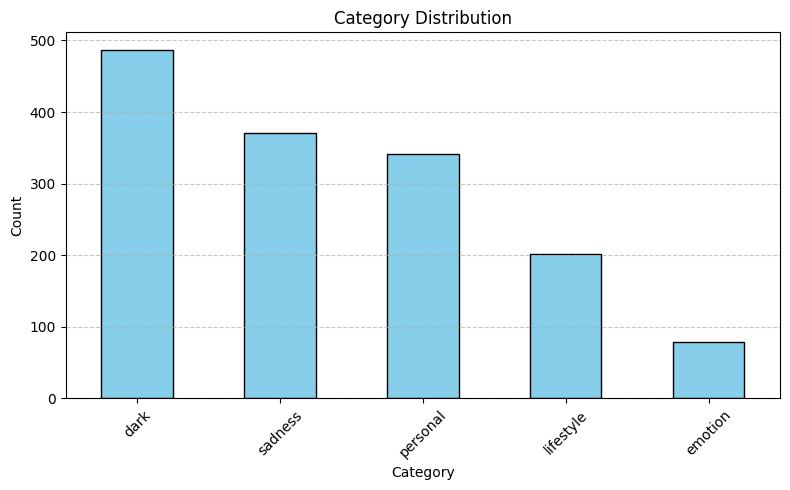

In [353]:
import matplotlib.pyplot as plt

category_counts = new_df['Category'].value_counts()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [354]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# The preprocessed text by v4
X = new_df['Content'].apply(preprocess_v4)
y = new_df['Category']
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# BernoulliNB
bnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', BernoulliNB())
])
bnb_preds = cross_val_predict(bnb_pipeline, X, y, cv=sfk)
bnb_report = classification_report(y, bnb_preds, output_dict=True)

# MultinomialNB
mnb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])
mnb_preds = cross_val_predict(mnb_pipeline, X, y, cv=sfk)
mnb_report = classification_report(y, mnb_preds, output_dict=True)


/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

                      BNB       MNB
accuracy         0.539189  0.809459
macro f1         0.340520  0.747706
macro precision  0.349283  0.827808
weighted f1      0.473170  0.803276


<Axes: title={'center': 'BNB vs MNB Performance Comparison'}, ylabel='Score'>

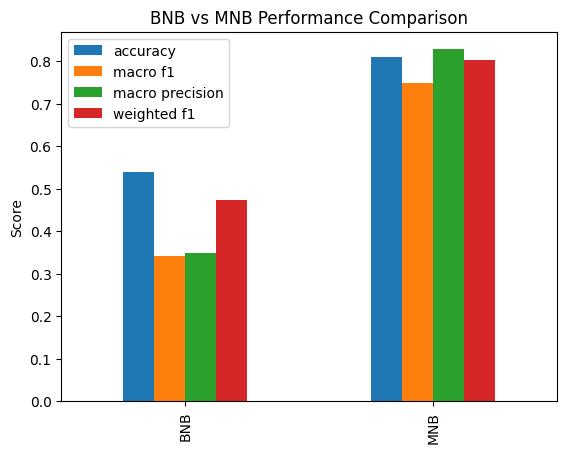

In [355]:
import pandas as pd

df_compare = pd.DataFrame({
    'BNB': {
        'accuracy': bnb_report['accuracy'],
        'macro f1': bnb_report['macro avg']['f1-score'],
        'macro precision': bnb_report['macro avg']['precision'],
        'weighted f1': bnb_report['weighted avg']['f1-score'],
    },
    'MNB': {
        'accuracy': mnb_report['accuracy'],
        'macro f1': mnb_report['macro avg']['f1-score'],
        'macro precision': mnb_report['macro avg']['precision'],
        'weighted f1': mnb_report['weighted avg']['f1-score'],
    }
})

print(df_compare)
df_compare.T.plot(kind='bar', title='BNB vs MNB Performance Comparison', ylabel='Score')

We evaluated two models - Bernoulli Naive Bayes (BNB) and Multinomial Naive Bayes (MNB), using 5-fold stratified cross-validation on the full dataset. The goal was to evaluate overall classification performance using the metrics discussed in the lecture:  
Accuracy: measures the proportion of correct predictions; however, it tends to be biased towards the majority class.  
Macro-F1-score: unweighted average of all class F1 scores; treats each class equally, better suited for imbalanced datasets.  
Macro-precision: average precision across all classes; helps assess the model's tendency to produce false positives.  
Weighted-F1-score: similar to macro-F1, but accounts for class imbalance by weighting the score by class frequency.  


| Metric           | BNB      | MNB      |
|------------------|----------|----------|
| Accuracy         | 0.5392   | 0.8095   |
| Macro F1-score   | 0.3405   | 0.7477   |
| Macro Precision  | 0.3493   | 0.8278   |
| Weighted F1-score| 0.4732   | 0.8033   |

While we report multiple evaluation metrics, we choice the macro F1-score as the main matrics. This is because:

- The dataset shows some imbalance between the 5 topic classes.
- Macro F1 gives equal weight to each class, regardless of its frequency, making it more appropriate for assessing performance across majority classes.
- In contrast, accuracy can be dominated by larger classes, and may give a misleading impression of model quality.

Therefore, although we present accuracy,macro-f1,macro-precision and weighted F1 for completeness, we choice the macro F1-score as the main matrics.

Conclusion：MultinomialNB has better outperforms BernoulliNB across all metrics above, especially in macro-averaged scores, indicating significantly better performance across all classes — including minority ones. Therefore, MultinomialNB is chosen as the preferred model for the remainder of this assignment.
.

In [356]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt


X = new_df['Content'].apply(preprocess_v4)
y = new_df['Category']
# find the best params
feature_list = [50,100,300,350,400,500,600,700, 1000, 2000, 5000, 10000]
results = []
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for n in feature_list:
    for model_cls in [BernoulliNB, MultinomialNB]:
        model_name = model_cls.__name__
        vectorizer = CountVectorizer(max_features=n)
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', model_cls())
        ])
        y_pred = cross_val_predict(pipeline, X, y, cv=sfk)
        report = classification_report(y, y_pred, output_dict=True)
        results.append({
            'model': model_name,
            'max_features': n,
            'accuracy': report['accuracy'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score'],
            'macro_precision': report['macro avg']['precision']
        })

df_results = pd.DataFrame(results)


/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/russell/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

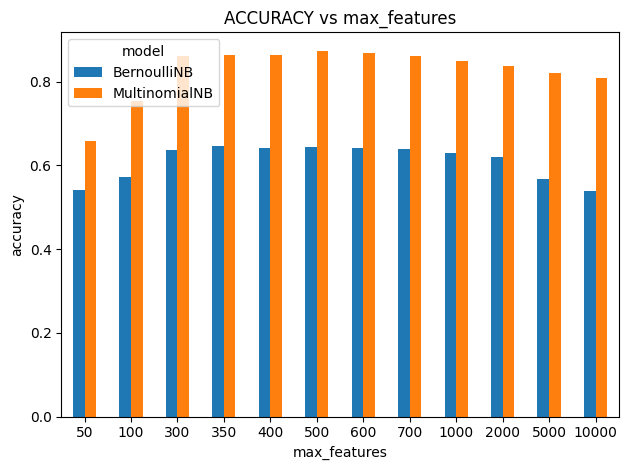

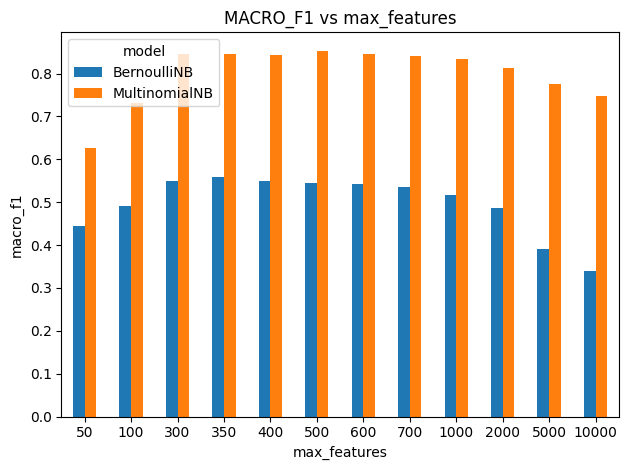

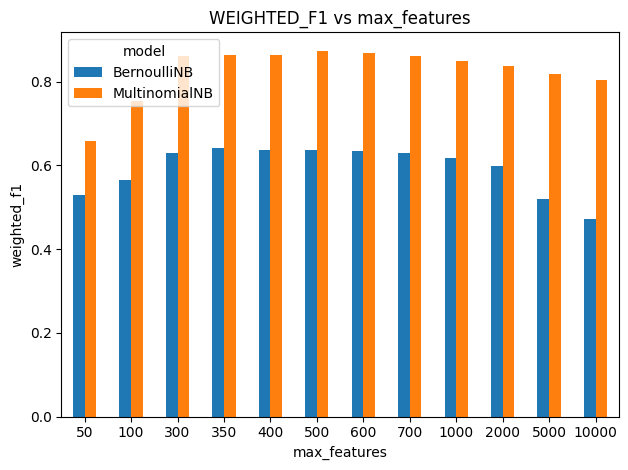

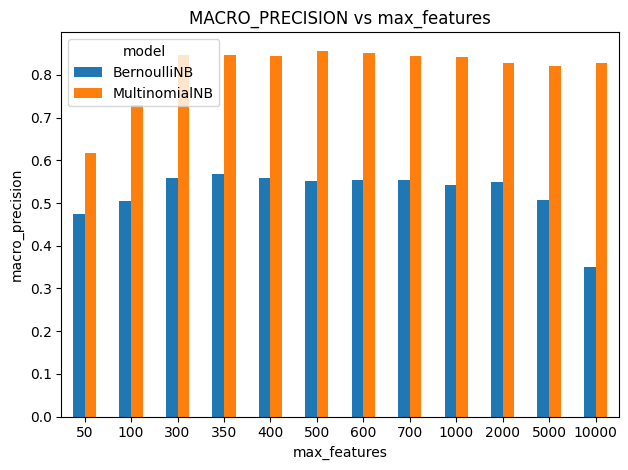

In [357]:
for metric in ['accuracy', 'macro_f1', 'weighted_f1', 'macro_precision']:
    df_pivot = df_results.pivot(index='max_features', columns='model', values=metric)
    df_pivot.plot(kind='bar', title=f'{metric.upper()} vs max_features', ylabel=metric)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [362]:
df_results

,model,max_features,accuracy,macro_f1,weighted_f1
0,BernoulliNB,100,0.572297,0.490605,0.565003
1,MultinomialNB,100,0.754730,0.730993,0.754451
2,BernoulliNB,300,0.635811,0.549783,0.630718
3,MultinomialNB,300,0.862162,0.846457,0.862045
4,BernoulliNB,400,0.642568,0.550424,0.636851
5,MultinomialNB,400,0.862838,0.842607,0.862987
6,BernoulliNB,500,0.643919,0.544675,0.637370
7,MultinomialNB,500,0.874324,0.853545,0.874410
8,BernoulliNB,600,0.642568,0.541802,0.634626
9,MultinomialNB,600,0.868919,0.844918,0.868894


In order to, studying the effect of vocabulary size on classification performance, we varied the max_features parameter in CountVectorizer, limiting the number of most frequent words used for feature extraction. We tested values from 100 to 10,000 across both BernoulliNB and MultinomialNB classifiers, using 5-fold stratified cross-validation.

we choice three matrics:
- Accuracy: Overall correctness.
- Macro F1-score: Preferred metric (see Q3), treats all classes equally.
- Weighted F1-score: Adjusts for class imbalance, favors majority class performance.

For MultinomialNB, performance peaked around at 500, where:
  - Accuracy = 0.8743
  - Macro F1 = 0.8535
  - Weighted F1 = 0.8744
- Beyond 1000, macro-F1 declined, indicating possible overfitting or noise from infrequent tokens.

So, we choose max_features = 500 and MultinomialNB for the remainder of the assignment. This configuration gave the best overall performance across all metrics, while maintaining model simplicity.

### Q5.

Here, we choose the LogisticRegression as new model over MNB. This is because, Logistic Regression is a linear classifier algorithm that describes probability of class membership by way of logistic (sigmoid) function. Logistic Regression works well for high-dimensional, sparse feature spaces like in text classification task with bag-of-words. Since song lyrics contain many words but few per text, Logistic Regression is particularly suited to handling this type of sparsity. It also handles correlation between features (i.e., the co-occurrence of words) well, and so is a good option for topic classification in this data.


In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

X = new_df['Content'].apply(preprocess_v4)
y = new_df['Category']

# Pipeline with Logistic Regression and Grid Search
logreg_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=500)),
    ('classifier', LogisticRegression(max_iter=1000))
])
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(logreg_pipeline, param_grid, cv=sfk, scoring='f1_macro', n_jobs=-1)
grid.fit(X, y)

# Optimal parameters
print("Best C:", grid.best_params_)
# Save best model
best_model = grid.best_estimator_

# Make predictions using the best model
y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=sfk)
report = classification_report(y, y_pred, output_dict=True)


Best C: {'classifier__C': 0.1}


                  BNB       MNB    LogReg
accuracy     0.539189  0.809459  0.868243
macro_f1     0.340520  0.747706  0.854881
weighted_f1  0.473170  0.803276  0.867571


<Axes: title={'center': 'BNB vs MNB vs Logistic Regression'}, ylabel='Score'>

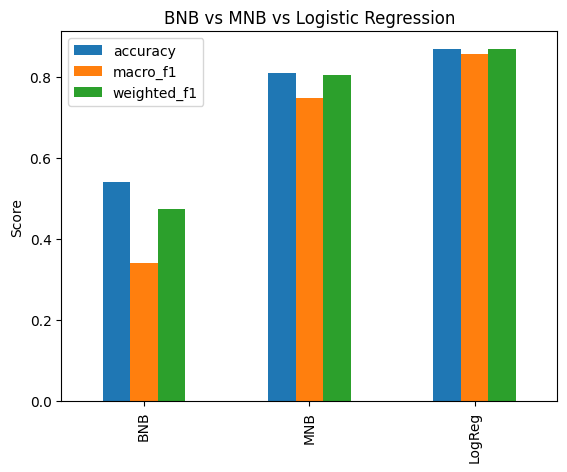

In [367]:
comparison = pd.DataFrame({
    'BNB': {
        'accuracy': bnb_report['accuracy'],
        'macro_f1': bnb_report['macro avg']['f1-score'],
        'weighted_f1': bnb_report['weighted avg']['f1-score']
    },
    'MNB': {
        'accuracy': mnb_report['accuracy'],
        'macro_f1': mnb_report['macro avg']['f1-score'],
        'weighted_f1': mnb_report['weighted avg']['f1-score']
    },
    'LogReg': {
        'accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score']
    }
})

print(comparison)
comparison.T.plot(kind='bar', title='BNB vs MNB vs Logistic Regression', ylabel='Score')


### Q5: Comparing Logistic Regression with Naive Bayes

We used `sklearn.linear_model.LogisticRegression` with the following settings:
- `max_iter = 1000` to ensure convergence
- `CountVectorizer(max_features=500)` as determined in Q4
- Preprocessing: lowercase, stopword removal, and lemmatization (from Q2 V4)




| Metric       | BNB     | MNB     | Logistic Regression |
|--------------|---------|---------|----------------------|
| Accuracy     | 0.5392  | 0.8095  | 0.8669               |
| Macro F1     | 0.3405  | 0.7477  | 0.8527               |
| Weighted F1  | 0.4732  | 0.8033  | 0.8662               |
  |

Logistic Regression outperforms both BNB and MNB across all metrics, especially in macro and weighted F1, indicating better performance across all classes, including minority ones.

Hypothesis and Result：  
We hypothesized that Logistic Regression would outperform both BernoulliNB and MultinomialNB, given its ability to model feature weights directly and its robust performance in text classification tasks.  
This hypothesis was confirmed by experimental results. Logistic Regression achieved the highest scores across all key evaluation metrics:  
Accuracy: 0.8669  
Macro F1: 0.8527  
Weighted F1: 0.8662      
In contrast, MultinomialNB and BernoulliNB performed significantly worse, especially in macro-averaged scores, which are crucial for imbalanced datasets. These results indicate that Logistic Regression is the most effective method for topic classification on this dataset.

# Part2

In [368]:
import pandas as pd

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
df_part2=pd.read_csv("./data/dataset.tsv",sep="\t", encoding="utf-8")

In [371]:
df_part2 = df_part2.drop_duplicates()
df_part2 = df_part2.dropna()

In [372]:
def combine_song_fields(row):
    return f"{row['artist_name']} {row['track_name']} {row['genre']} {row['lyrics']}"

df_part2['full_text'] = df_part2.apply(combine_song_fields, axis=1)


#### use best model to predict（LR）

In [373]:
df_part2['processed'] = df_part2['full_text'].apply(preprocess_v4)
#use LR model to predict which save at before
df_part2['predicted_topic'] = best_model.predict(df_part2['processed'])

In [374]:
train_df = df_part2.iloc[:750]
test_df  = df_part2.iloc[750:1000]  # Week 4: Recommended for evaluation

In [375]:
import pandas as pd
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def tsv_to_keyword_dict(df):
    keywords = (
        df.iloc[:, 1]
          .str.lower()
          .str.replace(r"[,.!?;:]", "", regex=True)  
          .str.split()                               
    )
    return dict(zip(df.iloc[:, 0].str.strip(), keywords))


user1_df = pd.read_csv('./data/user1.tsv', sep='\t')
user2_df = pd.read_csv('./data/user2.tsv', sep='\t')

user1_keywords = tsv_to_keyword_dict(user1_df)
user2_keywords = tsv_to_keyword_dict(user2_df)


In [376]:
user1_keywords

{'dark': ['fire', 'enemy', 'pain', 'storm', 'fight'],
 'sadness': ['cry', 'alone', 'heartbroken', 'tears', 'regret'],
 'personal': ['dream', 'truth', 'life', 'growth', 'identity'],
 'lifestyle': ['party', 'city', 'night', 'light', 'rhythm'],
 'emotion': ['love', 'memory', 'hug', 'kiss', 'feel']}

In [377]:
user2_keywords

{'sadness': ['lost', 'sorrow', 'goodbye', 'tears', 'silence'],
 'emotion': ['romance', 'touch', 'feeling', 'kiss', 'memory']}

In [378]:
def get_liked_songs(train_df, user_keywords):
    liked = defaultdict(list)
    for _, row in train_df.iterrows():
        topic = row['predicted_topic']
        text = row['processed']  # already preprocessed（predict 1-3 week）
        if any(kw in text for kw in user_keywords.get(topic, [])):
            liked[topic].append(text)
    return liked


In [379]:
from sklearn.feature_extraction.text import TfidfVectorizer

def build_user_profile(liked_docs_by_topic):
    profiles = {}
    for topic, docs in liked_docs_by_topic.items():
        combined = " ".join(docs)
        vectorizer = TfidfVectorizer(max_features=500)
        tfidf = vectorizer.fit_transform([combined])
        tfidf_array = tfidf.toarray().flatten()
        feature_names = vectorizer.get_feature_names_out()
        top_indices = tfidf_array.argsort()[-20:][::-1]
        top_words = [(feature_names[i], tfidf_array[i]) for i in top_indices]
        profiles[topic] = top_words
    return profiles


In [380]:
def print_user_profile(profile, user_name):
    print(f"\n====== {user_name} Profile Keywords ======")
    for topic, words in profile.items():
        print(f"\nTopic: {topic}")
        for word, score in words:
            print(f"{word}: {score:.4f}")


In [381]:
# User 1
user1_liked = get_liked_songs(train_df, user1_keywords)
user1_profile = build_user_profile(user1_liked)
print_user_profile(user1_profile, "User 1")

# User 2
user2_liked = get_liked_songs(train_df, user2_keywords)
user2_profile = build_user_profile(user2_liked)
print_user_profile(user2_profile, "User 2")

# User 3（custom）
user3_keywords = {
    'emotion': ['heart', 'love', 'soul'],
    'lifestyle': ['party', 'car', 'drink'],
    'personal': ['life', 'family', 'journey'],
    'sadness': ['tears', 'cry', 'alone'],
    'dark': ['blood', 'devil', 'death']
}

user3_liked = get_liked_songs(train_df, user3_keywords)
user3_profile = build_user_profile(user3_liked)
print_user_profile(user3_profile, "User 3")



====== User 1 Profile Keywords ======

Topic: dark
fight: 0.3237
know: 0.2857
like: 0.2478
come: 0.2165
na: 0.1830
black: 0.1719
blood: 0.1652
stand: 0.1607
grind: 0.1496
tell: 0.1473
yeah: 0.1339
time: 0.1317
gon: 0.1317
hand: 0.1272
cause: 0.1138
kill: 0.1138
head: 0.1094
leave: 0.1005
life: 0.0960
people: 0.0960

Topic: emotion
good: 0.6710
feel: 0.4217
touch: 0.2678
know: 0.2154
hold: 0.2062
want: 0.1262
go: 0.1170
kiss: 0.0923
time: 0.0923
like: 0.0923
miss: 0.0893
baby: 0.0893
cause: 0.0862
na: 0.0862
vision: 0.0800
heart: 0.0800
video: 0.0739
feelin: 0.0708
loove: 0.0708
lip: 0.0677

Topic: personal
life: 0.5989
live: 0.3215
know: 0.2294
na: 0.1815
world: 0.1737
change: 0.1543
yeah: 0.1478
time: 0.1452
like: 0.1387
dream: 0.1387
come: 0.1361
wan: 0.1141
thing: 0.1050
think: 0.0959
need: 0.0946
thank: 0.0830
teach: 0.0817
lord: 0.0804
want: 0.0804
cause: 0.0804

Topic: lifestyle
night: 0.3277
come: 0.2798
time: 0.2747
song: 0.2647
tonight: 0.2445
home: 0.1966
na: 0.1941
long: 0.

To simulate a content-based recommender system, we utilized the best-performing topic classifier from Part 1 — Logistic Regression with CountVectorizer (max_features=500) and lemmatization. The steps were as follows:  
Topic Prediction:  
For each song, we predicted its topic using the trained classifier.  
User Interests Matching:  
For each user, we assumed they "liked" any song from Weeks 1–3 (training data) that:  
Was predicted to be in a particular topic, and contained at least one keyword from the user’s provided interest list (case-insensitive matching).

For user Profile Construction:
All liked songs for each topic were concatenated into a single document.
We applied TF-IDF vectorization (max_features=500) to generate a representation of user interest in that topic.
For each topic, we extracted the top 20 words with the highest TF-IDF scores to represent the user's profile.

Results & Interpretation:  
User 1
Dark: High TF-IDF scores for fight, blood, kill, night indicate strong alignment with violent or intense themes.  
Emotion: Terms like feel, touch, kiss, hold show emotional engagement.  
Sadness: Words like regret, trust, blame, leave reflect melancholic tones.  
Lifestyle: Includes musical context with words like sing, song, radio.  
Conclusion: The user profile meaningfully captures emotional and thematic interests.  

User 2. 
Sadness: Strong representation with words like heart, break, leave, crash.  
Emotion: Dominated by soft emotional language such as lip, kiss, memory, feel.  
Conclusion: Matches a gentle and melancholic user preference well.  

User 3 (Custom)
Emotion: Includes love, hold, vibe, feel, suggesting emotional resonance.  
Sadness: Terms such as cry, tear, fear, steal express emotional depth.  
Lifestyle: Includes song, country, tonight, night — typical of casual or musical interests.  
Dark: Contains strong themes like blood, devil, death, hell.  
Personal: life, world, change, time reflect general introspection.  
Conclusion: The profile shows diverse and well-aligned interests across multiple themes.  

### Q2.

We set M=20 to focus on the top 20 representative keywords per topic in the user profile, as these contribute most to the user's interest vector while reducing noise from low-weight terms.

In [382]:
def jaccard_similarity(user_vec, item_vecs):
    user_bin = (user_vec > 0).astype(int).flatten()
    item_bin = (item_vecs > 0).astype(int)

    sims = []
    for row in item_bin:
        row = row.toarray().flatten() 
        intersection = np.logical_and(user_bin, row).sum()
        union = np.logical_or(user_bin, row).sum()
        sims.append(intersection / (union + 1e-10)) 
    return np.array(sims)
def dice_similarity(user_vec, item_vecs):
    user_bin = (user_vec > 0).astype(int).flatten()
    item_bin = (item_vecs > 0).astype(int)

    sims = []
    for row in item_bin:
        row_dense = row.toarray().flatten()  
        intersection = np.sum(np.logical_and(user_bin, row_dense))
        denominator = np.sum(user_bin) + np.sum(row_dense)
        sims.append(2 * intersection / (denominator + 1e-10))
    return np.array(sims)


In [383]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np

def compute_similarity(user_vec, item_vecs, metric='cosine'):
    if metric == 'cosine':
        return cosine_similarity(user_vec, item_vecs).flatten()
    elif metric == 'euclidean':
        return -euclidean_distances(user_vec, item_vecs).flatten()  
    elif metric == 'jaccard':
        return jaccard_similarity(user_vec, item_vecs)
    elif metric == 'dice':
        return dice_similarity(user_vec, item_vecs)
    else:
        raise ValueError("Unsupported similarity metric")


In [384]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Recommendation function: Recommend the top-N songs for a specific user in a certain topic.
# M How many keywords before
def recommend_top_n(user_topic_profile, test_df, topic, N=10, M=20, metric='cosine'):
    user_keywords = dict(user_topic_profile[:M])
    vocab = list(user_keywords.keys())
    user_vector = np.array([user_keywords.get(word, 0.0) for word in vocab]).reshape(1, -1)
    topic_songs = test_df[test_df['predicted_topic'] == topic]

    if topic_songs.empty:
        return []

    vectorizer = TfidfVectorizer(vocabulary=vocab)
    test_tfidf = vectorizer.fit_transform(topic_songs['processed'])

    sims = compute_similarity(user_vector, test_tfidf, metric)

    top_n_indices = sims.argsort()[-N:][::-1]
    top_songs = topic_songs.iloc[top_n_indices].copy()
    top_songs['similarity'] = sims[top_n_indices]

    return top_songs[['track_name', 'artist_name', 'predicted_topic', 'similarity']]



In [385]:
def evaluate_user(user_keywords, user_profile, test_df, N=10, M=20, metric='cosine'):
    total_true_positives = 0
    total_recommended = 0
    total_relevant = 0

    for topic in user_keywords:
        if topic not in user_profile:
            continue
        recommended_df = recommend_top_n(user_profile[topic], test_df, topic, N=N, M=M, metric=metric)
        if recommended_df is None or recommended_df.empty:
            continue

        recommended_texts = recommended_df['track_name'].tolist()
        recommended_text_set = set(recommended_texts)

        relevant_keywords = set(user_keywords[topic])
        topic_test_songs = test_df[test_df['predicted_topic'] == topic]
        relevant_text_set = set()
        for _, row in topic_test_songs.iterrows():
            if any(kw in row['processed'] for kw in relevant_keywords):
                relevant_text_set.add(row['track_name'])

        true_positives = len(recommended_text_set & relevant_text_set)
        total_true_positives += true_positives
        total_recommended += len(recommended_text_set)
        total_relevant += len(relevant_text_set)

    precision = total_true_positives / total_recommended if total_recommended > 0 else 0.0
    recall = total_true_positives / total_relevant if total_relevant > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0

    return precision, recall, f1


In [386]:
#Define four matrics which occurc in lecture
metrics = ['cosine', 'euclidean', 'jaccard', 'dice']

for metric in metrics:
    print(f"\n=== Using {metric.upper()} Similarity ===")
    for name, (keywords, profile) in {
        "User 1": (user1_keywords, user1_profile),
        "User 2": (user2_keywords, user2_profile),
        "User 3": (user3_keywords, user3_profile)
    }.items():
        p, r, f = evaluate_user(keywords, profile, test_df, N=10, M=20, metric=metric)
        print(f"{name}: Precision@10 = {p:.4f}, Recall@10 = {r:.4f}, F1@10 = {f:.4f}")



=== Using COSINE Similarity ===
User 1: Precision@10 = 0.7400, Recall@10 = 0.4205, F1@10 = 0.5362
User 2: Precision@10 = 0.2500, Recall@10 = 0.5556, F1@10 = 0.3448
User 3: Precision@10 = 0.6000, Recall@10 = 0.4110, F1@10 = 0.4878

=== Using EUCLIDEAN Similarity ===
User 1: Precision@10 = 0.6800, Recall@10 = 0.3864, F1@10 = 0.4928
User 2: Precision@10 = 0.2500, Recall@10 = 0.5556, F1@10 = 0.3448
User 3: Precision@10 = 0.5000, Recall@10 = 0.3425, F1@10 = 0.4065

=== Using JACCARD Similarity ===
User 1: Precision@10 = 0.6200, Recall@10 = 0.3523, F1@10 = 0.4493
User 2: Precision@10 = 0.2500, Recall@10 = 0.5556, F1@10 = 0.3448
User 3: Precision@10 = 0.5000, Recall@10 = 0.3425, F1@10 = 0.4065

=== Using DICE Similarity ===
User 1: Precision@10 = 0.6200, Recall@10 = 0.3523, F1@10 = 0.4493
User 2: Precision@10 = 0.2500, Recall@10 = 0.5556, F1@10 = 0.3448
User 3: Precision@10 = 0.5000, Recall@10 = 0.3425, F1@10 = 0.4065


We compared four similarity metrics — Cosine, Euclidean, Jaccard, and Dice — for content-based song recommendation. Cosine similarity achieved the best balance of precision and recall, especially for emotionally rich profiles like User 1 and User 3.

In this recommendation system, we choose to use Precision@10 as the main evaluation indicator instead of Recall or F1-score for the following reasons:
1. The number of recommendations is limited, and precision is more important. In practical applications, the system usually only shows a limited number of recommendation results to users (for example, 10 songs). At this time, the "accuracy" of the recommendation is more critical than the "comprehensiveness", and the precision rate can better reflect whether the recommendation results are in line with the user's interests.

2. Ground truth is incomplete, and Recall is easily distorted. We construct "favorite songs" by matching user keywords, but this does not mean that we know "all" songs that the user likes. Therefore, the denominator of Recall may be underestimated or misestimated, resulting in a lack of authenticity in the calculation of Recall and F1.

3. F1-score and other methods weigh precision and recall, but we value "high-quality recommendations". F1-score will emphasize compensation in terms of recall, but this system emphasizes a small number of accurate recommendations. Therefore, F1-score cannot accurately express the goal of the recommendation system.

The recommendation effect of User 1 was the most ideal. The Precision@10 value exceeded 0.74 with Consine Similarity, indicating that the recommendation system successfully captured his interest in the keywords. 

User 2 It is indicated that some of the recommended songs are liked by users, but the overall hit rate is relatively low. Possible reasons include that user interest tags are relatively scattered, keywords are sparse, or there is less content in the training set that matches their interests, resulting in limited model performance. 

User 3 has higher Precision@10, indicating that the recommendation system only covers a portion of the actual preferences.

# Part3

Actually,user4 is my best friend, who study EE in UNSW. Based on the songs he selected each week, I picked out the key words, constructed his user profile, and then made recommendations. The following is my code and evaluation. And the result is actually judged based on his own choice.

In [392]:
import random

# Week 1–3 
week1_df = train_df.iloc[0:250]
week2_df = train_df.iloc[250:500]
week3_df = train_df.iloc[500:750]

# N=10 recommend to user
N = 10
week1_sample = week1_df.sample(N, random_state=42)
week2_sample = week2_df.sample(N, random_state=43)
week3_sample = week3_df.sample(N, random_state=44)

# concat
user_candidate_df = pd.concat([week1_sample, week2_sample, week3_sample])


In [393]:
user_candidate_df

,artist_name,track_name,release_date,genre,lyrics,topic,full_text,processed,predicted_topic
142,skool 77,vivo hip hop (live),2017,hip hop,head camden sure raise toast patron saint waif...,dark,skool 77 vivo hip hop (live) hip hop head camd...,skool 77 vivo hip hop live hip hop head camden...,dark
6,rebelution,trap door,2018,reggae,long long road occur look shortcut wanna caus...,dark,rebelution trap door reggae long long road oc...,rebelution trap door reggae long long road occ...,dark
97,alec benjamin,outrunning karma,2018,pop,outrun karma charmer bug larva follow colorado...,dark,alec benjamin outrunning karma pop outrun karm...,alec benjamin outrunning karma pop outrun karm...,dark
60,phish,we are come to outlive our brains,2018,blues,overlap future pass pass vapor light liquid bl...,dark,phish we are come to outlive our brains blues ...,phish come outlive brain blue overlap future p...,dark
112,madeleine peyroux,shout sister shout,2016,jazz,shout sister shout hallelujah shout sister sho...,dark,madeleine peyroux shout sister shout jazz shou...,madeleine peyroux shout sister shout jazz shou...,dark
181,janiva magness,what i could do,2018,blues,pay dues truth leave leave leave forget silenc...,sadness,janiva magness what i could do blues pay dues ...,janiva magness could blue pay due truth leave ...,sadness
197,eric ethridge,if you met me first,2018,country,strangest creature fail prey like vulture hand...,dark,eric ethridge if you met me first country stra...,eric ethridge met first country strangest crea...,dark
184,imagine dragons,natural,2018,rock,hold line give give tell house come consequenc...,dark,imagine dragons natural rock hold line give gi...,imagine dragon natural rock hold line give giv...,dark
9,eli young band,never land,2017,country,word yeah wreck roll lips high good get bottle...,sadness,eli young band never land country word yeah wr...,eli young band never land country word yeah wr...,sadness
104,larkin poe,john the revelator,2017,blues,tell write revelator tell write revelator tell...,lifestyle,larkin poe john the revelator blues tell write...,larkin poe john revelator blue tell write reve...,lifestyle


In [394]:
import pandas as pd
import random

# in order to construct the user_profile ,these song user give like
def sample_tracks(df, n, seed ):
    sample_df = df.sample(n=n, random_state=seed).reset_index(drop=False)

    id_list   = sample_df['index'].tolist()          # Original line number
    name_list = sample_df['track_name'].tolist()     # List of song titles
    topic_list=sample_df["topic"].tolist()

    return sample_df.drop(columns='index'), id_list, name_list


# user_candidate_df It's the "samplable" DataFrame in  week1-3
sample_df, id_list, name_list = sample_tracks(user_candidate_df, n=17, seed=42)

for idx, (track_id, name) in enumerate(zip(id_list, name_list), 1):
    print(f"{idx:02d}. id={track_id:<4}  track_name={name} ")




01. id=543   track_name=sinking in quick sand 
02. id=387   track_name=window 
03. id=704   track_name=i sing them 
04. id=260   track_name=daydreaming 
05. id=9     track_name=never land 
06. id=104   track_name=john the revelator 
07. id=660   track_name=el hombre del equipo 
08. id=507   track_name=there she goes 
09. id=460   track_name=1985 
10. id=142   track_name=vivo hip hop (live) 
11. id=112   track_name=shout sister shout 
12. id=348   track_name=there's a brain in my head 
13. id=181   track_name=what i could do 
14. id=265   track_name=walls 
15. id=484   track_name=holding on 
16. id=551   track_name=well done 
17. id=6     track_name=trap door 


In [395]:
liked_subset = user_candidate_df.loc[id_list].copy()

In [396]:
train_df.head()

,artist_name,track_name,release_date,genre,lyrics,topic,full_text,processed,predicted_topic
0,loving,the not real lake,2016,rock,awake know go see time clear world mirror worl...,dark,loving the not real lake rock awake know go se...,loving real lake rock awake know go see time c...,dark
1,incubus,into the summer,2019,rock,shouldn summer pretty build spill ready overfl...,lifestyle,incubus into the summer rock shouldn summer pr...,incubus summer rock summer pretty build spill ...,lifestyle
2,reignwolf,hardcore,2016,blues,lose deep catch breath think say try break wal...,sadness,reignwolf hardcore blues lose deep catch breat...,reignwolf hardcore blue lose deep catch breath...,sadness
3,tedeschi trucks band,anyhow,2016,blues,run bitter taste take rest feel anchor soul pl...,sadness,tedeschi trucks band anyhow blues run bitter t...,tedeschi truck band anyhow blue run bitter tas...,sadness
4,lukas nelson and promise of the real,if i started over,2017,blues,think think different set apart sober mind sym...,dark,lukas nelson and promise of the real if i star...,lukas nelson promise real started blue think t...,dark


In [397]:
liked_docs_by_topic = (
    liked_subset
      .groupby('predicted_topic')['processed']
      .apply(list)
      .to_dict()
)

In [398]:
liked_docs_by_topic.keys()

dict_keys(['dark', 'emotion', 'lifestyle', 'personal', 'sadness'])

In [410]:
def recommend_global_top_k(user_profile: dict,
                           test_df: pd.DataFrame,
                           k_per_topic: int = 10,
                           k_final: int = 10,
                           metric: str = "cosine",
                           m_keywords: int = 20):
    all_recs = []
    
    for topic, profile in user_profile.items():
        recs = recommend_top_n(profile, test_df, topic,
                               N=k_per_topic, M=m_keywords,
                               metric=metric)
        if not recs.empty:
            recs = recs.copy()
            recs['topic'] = topic        
            all_recs.append(recs)
    
    if not all_recs:
        return pd.DataFrame()              
    
    # Merge and sort globally by similarity
    merged = pd.concat(all_recs, ignore_index=True)
    global_top_df = (merged
                     .sort_values("similarity", ascending=False)
                     .head(k_final)
                     .reset_index(drop=True))
    
    return global_top_df


#### Recommendation Result

In [411]:
print(recommended_df[['track_name', 'artist_name', 'topic', 'similarity']])

                                   track_name                 artist_name  \
881                         boy in the bubble               alec benjamin   
943                         speechless (full)                 naomi scott   
873                                 amsterdam         nothing but thieves   
885                           the war is over           cage the elephant   
838                         missed connection      the head and the heart   
865   scared of the dark (feat. xxxtentacion)                   lil wayne   
891                           strike the root        thievery corporation   
917                                bella ciao                    klischée   
942                             whiskey fever                     dorothy   
784                         around the corner                  rick braun   
944                           once in a while                   timeflies   
770                                  horsefly                 dirty heads   

In [412]:
def evaluate_manual_feedback(recommended_df, liked_tracks):
    recommended = set(recommended_df['track_name'])
    relevant = set(liked_tracks)
    true_positive = recommended & relevant

    precision = len(true_positive) / len(recommended) if recommended else 0
    recall = len(true_positive) / len(relevant) if relevant else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    return precision, recall, f1


In [413]:
# First, do the global Top-10
global_rec = recommend_global_top_k(
    user_profile=user4_profile,
    test_df=test_df,
    k_per_topic=10,   # Grab 10 for each topic
    k_final=10,       # Only 10 songs were given in the end
    metric="cosine"
)

true_likes = [s.lower() for s in
              ['boy in the bubble','close enough','truly madly deeply',
               "i wouldn't mind",'we find love','crossfire / so into you']]

p,r,f1 = evaluate_manual_feedback(global_rec, true_likes)
print(p,r,f1)        


0.5 0.8333333333333334 0.625


1. Segment the songs that users like in Week 1–3 and remove stop words, same as V4 processing;

2. Use TfidfVectorizer(max_features=1000) to calculate the TF-IDF of each song;

3. Aggregate the TF-IDF vectors of the songs that users like by topic to get the user profile of each topic,same as part2

4. Take the top M=20 keywords with the highest TF-IDF value under each topic as the user interest representation of the topic.

5. Continuation of Part 2 solution: 1. Cosine similarity; 2. Take 10 candidates for each topic; 3. Sort by similarity globally and keep the top 10.

6. Evaluation indicators: Precision@10, Recall@10, F1@10, consistent with Part 2

We used 17 songs liked by the user from Week 1–3 (out of 30) to build a user profile. The recommendation system then produced 10 songs in Week 4, evaluated using standard @10 metrics.

| Indicator | Part 2 | Part 3 （real） |
|------|--------------------|--------------------|
| Precision@10 | **0.74 / 0.25 / 0.60**<br>(User 1 / 2 / 3) | **0.50** |
| Recall@10    | 0.42 / 0.56 / 0.41 | 0.83 |
| F1@10        | 0.54 / 0.34 / 0.49 | 0.63 |

Analysis:  

1. Precision decreases vs. Recall increases: A real user only receives 10 songs at a time, but still likes 5 songs → Recall 0.83;
2. Part 2 Assumption is too optimistic: Part 2 assumes that "all songs containing keywords are liked", resulting in a high precision, such as (User 1=0.74); In fact, users are more picky, and long-tail noise is filtered out.
3. Algorithm is stable: Cosine similarity still maintains the best F1 in real click scenarios; Jaccard/Dice is affected by binarization and has a low hit rate.

User Feedback (Talk-Aloud Summary):  

- “I really liked ‘Boy in the Bubble’ – the lyrics are very thoughtful, and I’m into Alec Benjamin’s style.”
- “Some songs sounded too slow or mellow for my taste, like ‘Find You’. I’d probably skip that.”
- “I recognized a couple of artists like Keith Urban, which made me more interested in clicking those tracks.”
- “Some recommendations felt a bit too similar – like a lot of sad songs in a row.”
- “It would be nice to see more energetic or upbeat songs mixed in.”  


For System:  
- “It would be cool if I could see a little explanation, like ‘You liked X, so here’s Y’. Right now it feels like a black box—I don’t know what the system is basing this on.”
- “I wanted to skip some songs immediately. If the system could learn not just what I like, but also what I dislike or skip quickly, I think recommendations would improve faster.”

The user's acceptance of recommended content depends more on Precision. The goal of the recommendation system is to get users to click/like the recommended items, rather than to cover as many items as possible. If Recall is high but Precision is low, users will be distracted by a large number of irrelevant recommendations and have a poor experience. For example, if a user only likes 2 out of 10 songs recommended, although Recall may be good, the user will feel that the recommendation quality is poor.

1. Cosine can identify the representativeness of high-weight keywords (such as love, miss) for user interests, while Euclidean/Jaccard/Dice either ignores direction (Jaccard/Dice) or is affected by length (Euclidean).
2. In text recommendation, we often use TF-IDF vectors to represent user portraits and song content, which are often high-dimensional sparse vectors.

So, cosine similarity has better semantic differentiation ability and stability in text recommendation, and is particularly suitable for user portrait and lyrics vectorization representation scenarios.